In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'x'       : [4.5,5.8,6.5,7.0,5.0,6.0,8.6] ,
                   'y'       : [190,220,280,320,200,250,380] ,
                   "outcome" : [0,0,1,1,0,0,1]})

In [3]:
x = df['x']
y = df["outcome"]

In [4]:
df

,x,y,outcome
0,4.5,190,0
1,5.8,220,0
2,6.5,280,1
3,7.0,320,1
4,5.0,200,0
5,6.0,250,0
6,8.6,380,1


In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
beta1 =  np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x-np.mean(x))**2)
beta1

0.31760435571687845

In [7]:
beta0 = np.mean(y) - beta1*np.mean(x)
beta0

-1.5405755768732179

In [8]:
y_pred = beta0 + (beta1*x)
y_pred

array([-0.11135598,  0.30152969,  0.52385274,  0.68265491,  0.0474462 ,
        0.36505056,  1.19082188])

In [9]:
#              1
#  P  =   ___________
#                  -(B0+B1*X)       
#          1   +  e


# where B0+B1*X = z


#                             z
#    1                      e
#  _______        =     _________
#          -z                    z
#   1 +  e               1  +  e

In [10]:
#                             
#    1                      
#  _______       
#          -z                    
#   1 +  e               


y_predict_prob = 1 / (1 + np.exp(-y_pred))
y_predict_prob

array([0.47218974, 0.57481642, 0.62804822, 0.66433099, 0.51185933,
       0.59026248, 0.76688802])

In [11]:
#      z
#    e
# _________
#        z
# 1  +  e


np.exp(y_pred) / (1 + np.exp(y_pred))

array([0.47218974, 0.57481642, 0.62804822, 0.66433099, 0.51185933,
       0.59026248, 0.76688802])

In [12]:
#converting the probability score to class
# Predicted labels
outcome_pred = []
for val in y_predict_prob:
    if val > np.mean(y_predict_prob):
        outcome_pred.append(1)
    else:
        outcome_pred.append(0)
print(outcome_pred)

[0, 0, 1, 1, 0, 0, 1]


In [13]:
#Refer day 1 result.summary()
x = np.array([0,0,0,0,1,1,1,1]).reshape(-1,1)
y = np.array([100,120,140,160,220,230,240,260])

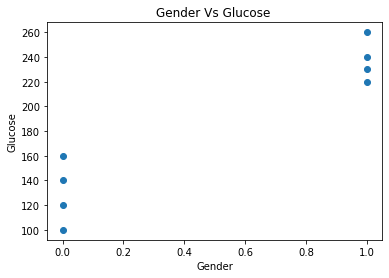

In [14]:
plt.scatter(x,y)
plt.xlabel("Gender")
plt.ylabel("Glucose")
plt.title("Gender Vs Glucose ")
plt.show()

In [15]:
#class 0 is Female
#class 1 is Male

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model  = LinearRegression().fit(x,y)

In [18]:
#beta0
model.intercept_

130.0

In [19]:
#beta1
model.coef_

array([107.5])

In [20]:
#predicted value of glucose for male
# y   = B0 + B1 * Gender
glu = 130 + 107.5 * 1   
glu

237.5

In [21]:
#Gender =1 means male
# 130 is the average of female group
# 130 + 107.5 is the average of female group

In [22]:
#predicted value of glucose for female 
# y   = B0 + B1 * Gender
#female gender = 0
# y = B0
glu = 130 + (107.5 * 0)
glu

130.0

In [23]:
#IF we change the labelling
# male =  0
# female = 1
# will the beta values yes

In [24]:
x = np.array([1,1,1,1,0,0,0,0]).reshape(-1,1)
y = np.array([100,120,140,160,220,230,240,260])

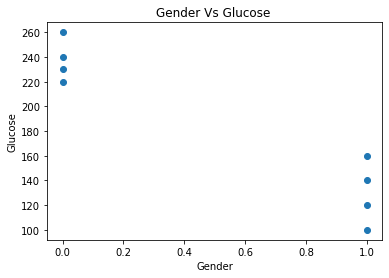

In [25]:
plt.scatter(x,y)
plt.xlabel("Gender")
plt.ylabel("Glucose")
plt.title("Gender Vs Glucose ")
plt.show()

In [26]:
#male = 0
#female = 1


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model1  = LinearRegression().fit(x,y)

In [29]:
model1.intercept_

237.5

In [30]:
model1.coef_

array([-107.5])

In [31]:
# y =  B0 + B1*Gender
#maLe = 0
glu =  237.5 - 107.5*0
glu

237.5

In [32]:
# Female
glu =  237.5 - 107.5*1
glu

130.0

In [33]:
# EVEN IF WE INTERCHAGE THE LABEL THE VALUES OF BETA0 AND BETA1 is not affected
# Model coefficients automatically adjust according to the label

### Session 2

In [34]:
# Entropy is the measure of uncertainity
# refer Nb

In [35]:
-((0.678*np.log2(0.678)) + (0.322*np.log2(0.322)))

0.9065431379027392

In [36]:
# Highest entropy is 1(that is highest loss)
# When we have 50%-50% probability of getting 1 or 0 as class label
# Then model takes the decision whether to select 1 or 0
-((0.5*np.log2(0.5))+(0.5*np.log2(0.5)))

1.0

# Decision Tree

In [37]:
sal_x1        = np.array([15,17,28,10,40,50,55])
age_x2        = np.array([28,25,30,35,38,32,40])
Loandefault_y = np.array([1,0,1,1,0,1,0])

In [38]:
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings(action = "ignore")

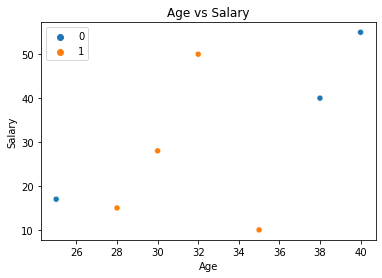

In [40]:
sns.scatterplot(age_x2 , sal_x1 , hue = Loandefault_y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

In [41]:
-(((4/7)*np.log2(4/7))+((3/7)*np.log2(3/7)))

0.9852281360342515

### Decision Tree as regressor

In [42]:
y         = np.array([77,47,55,59,72,60,40,60,45,58])


In [43]:
np.mean(y)

57.3

In [44]:
y_predict = np.array([57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3])

In [45]:
np.sum((y - y_predict)**2)/len(y)

118.41000000000001

In [46]:
y = np.array([47,55,59,40,60,45,58])

In [47]:
y_pred = np.mean(y)
y_pred

52.0

In [48]:
np.sum((y - y_pred)**2)/len(y)

53.714285714285715

In [49]:
 y = np.array([77,72])

In [50]:
y_pred = np.mean(y)
y_pred

74.5

In [51]:
np.sum((y-y_pred)**2)/len(y)

6.25